In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.externals import joblib

sns.set()
plt.rcParams['figure.figsize'] = (20,10)

In [10]:
df = pd.read_csv('data/dataFinal.csv')
df = df.drop('Unnamed: 0', axis=1)
df.theta = df.theta.astype(float)
df.yDistance = df.yDistance.astype(float)
df.xDistance = df.xDistance.astype(float)
df.columns = ['y', 'x', 'theta', 'width', 'height', 'center_x', 'center_y', 'aspect_ratio', 'height_ratio', 'y_diff']
df2 = df.groupby(['y','x','theta']).agg({'width':'mean', 'height':'mean', 'center_x':'mean', 'center_y':'mean',
                                  'aspect_ratio':'mean', 'height_ratio':'mean', 'y_diff':'mean'}).reset_index()

In [25]:
X = df2.drop(['x', 'y', 'theta'], axis=1)
theta_y = df2['theta']
y_y = df2['y']
x_y = df2['x']

In [28]:
# load model from file
theta_gbr = joblib.load("thetaGBR.joblib.dat")
x_gbr = joblib.load("xGBR.joblib.dat")
y_mlp = joblib.load("yMLP.joblib.dat")

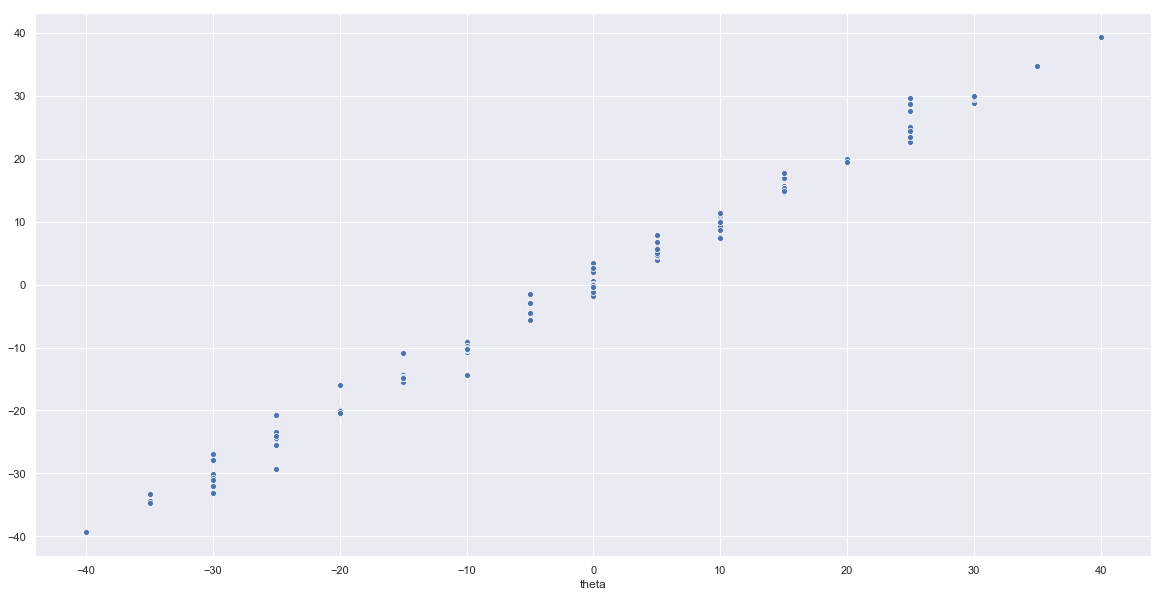

In [27]:
sns.scatterplot(theta_y, theta_gbr.predict(X))

In [29]:
from datetime import timedelta
import datetime

times = []
for i in range(100):
    tStart = datetime.datetime.now()
    theta_gbr.predict(X)
    x_gbr.predict(X)
    y_mlp.predict(X)
    elapsedTime = (datetime.datetime.now() - tStart).microseconds/1000
    times = np.append(times, elapsedTime)
mean = np.mean(times)
framerate = 1000/mean
framerate


55.30493203853427

In [30]:
mean

18.08157